# Clear Cache

In [ ]:
from dataset import ImageDataset, load_dataset, train_val_split, data_augmentation
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.3
## Load dataset

In [ ]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.3.npz')

## Preprocessing

In [ ]:
T = torch.tensor([[0.7, 0.3, 0.0],
                  [0.0, 0.7, 0.3],
                  [0.3, 0.0, 0.7]], dtype=torch.float32)

training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(aug_training, aug_labels, transition_matrix=T)
val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [ ]:
import os
if not os.path.exists('results/cnn_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 0.6421, Validation Loss: 0.6252, Validation Accuracy: 69.33%
Epoch [2/100], Training Loss: 0.6274, Validation Loss: 0.6329, Validation Accuracy: 69.31%
Epoch [3/100], Training Loss: 0.6246, Validation Loss: 0.6217, Validation Accuracy: 69.44%
Epoch [4/100], Training Loss: 0.6218, Validation Loss: 0.6228, Validation Accuracy: 69.64%
Epoch [5/100], Training Loss: 0.6199, Validation Loss: 0.6222, Validation Accuracy: 69.53%
Epoch [6/100], Training Loss: 0.6191, Validation Loss: 0.6292, Validation Accuracy: 69.06%
Epoch [7/100], Training Loss: 0.6190, Validation Loss: 0.6229, Validation Accuracy: 69.56%
Epoch [8/100], Training Loss: 0.6170, Validation Loss: 0.6802, Validation Accuracy: 68.58%
Epoch [9/100], Training Loss: 0.6179, Validation Loss: 0.6298, Validation Accuracy: 69.36%
Epoch [10/100], Training Loss: 0.6179, Validation Loss: 0.6270, Validation Accuracy: 69.33%
Epoch [11/100], Training Loss: 0.6164, Valida

## CNN with Noise Adaption Layer Training

In [ ]:
import os
if not os.path.exists('results/cnnwithnal_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch: 0/100


c:\Users\Ronald\Desktop\COMP5328_A2\utils.py:30: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  print('# Train || Loss : %.4f , Acc : %.4f%%' % (train_loss_meter.val, train_acc_meter.val * 100.0))


# Train || Loss : 0.6224 , Acc : 71.8750%
# Evaluation || Loss : 0.6582, Acc : 68.7500%
Epoch: 1/100
# Train || Loss : 0.6559 , Acc : 73.4375%
# Evaluation || Loss : 0.6358, Acc : 68.7500%
Epoch: 2/100
# Train || Loss : 0.6813 , Acc : 60.9375%
# Evaluation || Loss : 0.6708, Acc : 68.7500%
Epoch: 3/100
# Train || Loss : 0.6510 , Acc : 67.1875%
# Evaluation || Loss : 0.6634, Acc : 68.7500%
Epoch: 4/100
# Train || Loss : 0.5619 , Acc : 76.5625%
# Evaluation || Loss : 0.6869, Acc : 68.7500%
Epoch: 5/100
# Train || Loss : 0.6980 , Acc : 59.3750%
# Evaluation || Loss : 0.6198, Acc : 68.7500%
Epoch: 6/100
# Train || Loss : 0.6585 , Acc : 70.3125%
# Evaluation || Loss : 0.6183, Acc : 68.7500%
Epoch: 7/100
# Train || Loss : 0.5639 , Acc : 76.5625%
# Evaluation || Loss : 0.6405, Acc : 68.7500%
Epoch: 8/100
# Train || Loss : 0.5990 , Acc : 73.4375%
# Evaluation || Loss : 0.7609, Acc : 56.2500%
Epoch: 9/100
# Train || Loss : 0.5824 , Acc : 73.4375%
# Evaluation || Loss : 0.6431, Acc : 68.7500%
Epo

## Visualisation
### Top-1 Accuracy

/tmp/ipykernel_7672/4284851602.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)


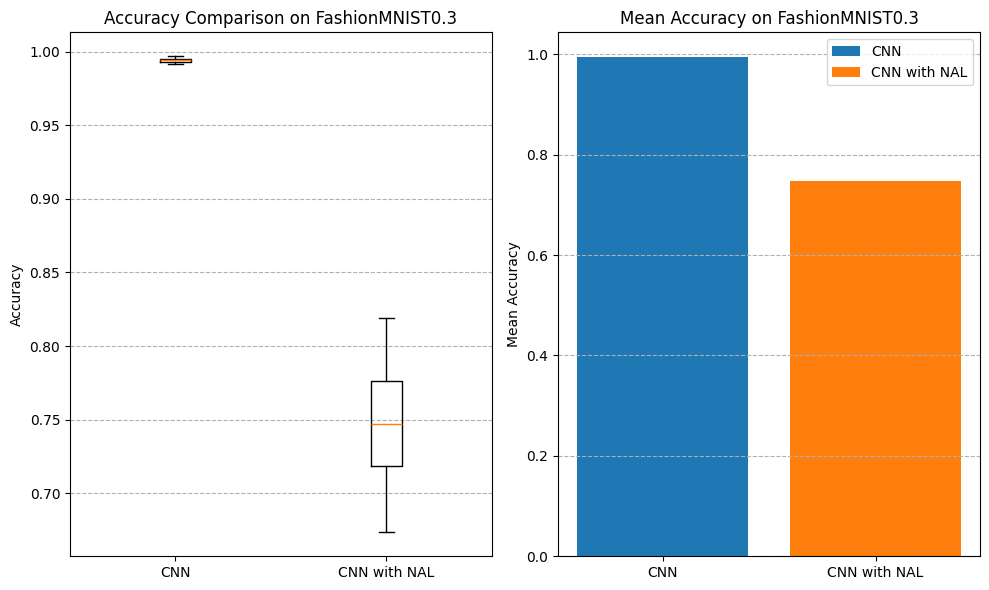

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnn_acc_03 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_03 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.3')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_03), np.mean(cnnwithnal_acc_03)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.3')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.show()


# FashionMNIST0.6
## Load dataset

In [ ]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.6.npz')

## Preprocessing

In [ ]:
T = torch.tensor([[0.4, 0.3, 0.3],
                  [0.3, 0.4, 0.3],
                  [0.3, 0.3, 0.4]], dtype=torch.float32)
training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(aug_training, aug_labels, transition_matrix=T)
val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [ ]:
import os
if not os.path.exists('results/cnn_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.6")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 1.0981, Validation Loss: 1.0960, Validation Accuracy: 36.83%
Epoch [2/100], Training Loss: 1.0930, Validation Loss: 1.0936, Validation Accuracy: 37.97%
Epoch [3/100], Training Loss: 1.0923, Validation Loss: 1.0923, Validation Accuracy: 38.25%
Epoch [4/100], Training Loss: 1.0918, Validation Loss: 1.1058, Validation Accuracy: 34.14%
Epoch [5/100], Training Loss: 1.0916, Validation Loss: 1.0919, Validation Accuracy: 38.44%
Epoch [6/100], Training Loss: 1.0917, Validation Loss: 1.0932, Validation Accuracy: 38.08%
Epoch [7/100], Training Loss: 1.0917, Validation Loss: 1.0927, Validation Accuracy: 38.47%
Epoch [8/100], Training Loss: 1.0914, Validation Loss: 1.0926, Validation Accuracy: 38.33%
Epoch [9/100], Training Loss: 1.0943, Validation Loss: 1.1021, Validation Accuracy: 34.58%
Epoch [10/100], Training Loss: 1.0924, Validation Loss: 1.0932, Validation Accuracy: 38.42%
Epoch [11/100], Training Loss: 1.0914, Valida

## CNN with Noise Adaption Layer Training

In [ ]:
import os
if not os.path.exists('results/cnnwithnal_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.6")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch: 0/100


c:\Users\Ronald\Desktop\COMP5328_A2\utils.py:30: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  print('# Train || Loss : %.4f , Acc : %.4f%%' % (train_loss_meter.val, train_acc_meter.val * 100.0))


# Train || Loss : 1.1074 , Acc : 31.2500%
# Evaluation || Loss : 1.1153, Acc : 25.0000%
Epoch: 1/100
# Train || Loss : 1.0660 , Acc : 43.7500%
# Evaluation || Loss : 1.0815, Acc : 50.0000%
Epoch: 2/100
# Train || Loss : 1.0954 , Acc : 37.5000%
# Evaluation || Loss : 1.0888, Acc : 37.5000%
Epoch: 3/100
# Train || Loss : 1.0933 , Acc : 40.6250%
# Evaluation || Loss : 1.0978, Acc : 50.0000%
Epoch: 4/100
# Train || Loss : 1.0936 , Acc : 35.9375%
# Evaluation || Loss : 1.0980, Acc : 31.2500%
Epoch: 5/100
# Train || Loss : 1.1132 , Acc : 39.0625%
# Evaluation || Loss : 1.0897, Acc : 37.5000%
Epoch: 6/100
# Train || Loss : 1.1303 , Acc : 28.1250%
# Evaluation || Loss : 1.0816, Acc : 37.5000%
Epoch: 7/100
# Train || Loss : 1.1144 , Acc : 32.8125%
# Evaluation || Loss : 1.1104, Acc : 25.0000%
Epoch: 8/100
# Train || Loss : 1.0715 , Acc : 40.6250%
# Evaluation || Loss : 1.1111, Acc : 43.7500%
Epoch: 9/100
# Train || Loss : 1.0981 , Acc : 31.2500%
# Evaluation || Loss : 1.0911, Acc : 50.0000%
Epo

## Visualisation
### Top-1 Accuracy

C:\Users\brian\AppData\Local\Temp\ipykernel_71616\1686148792.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


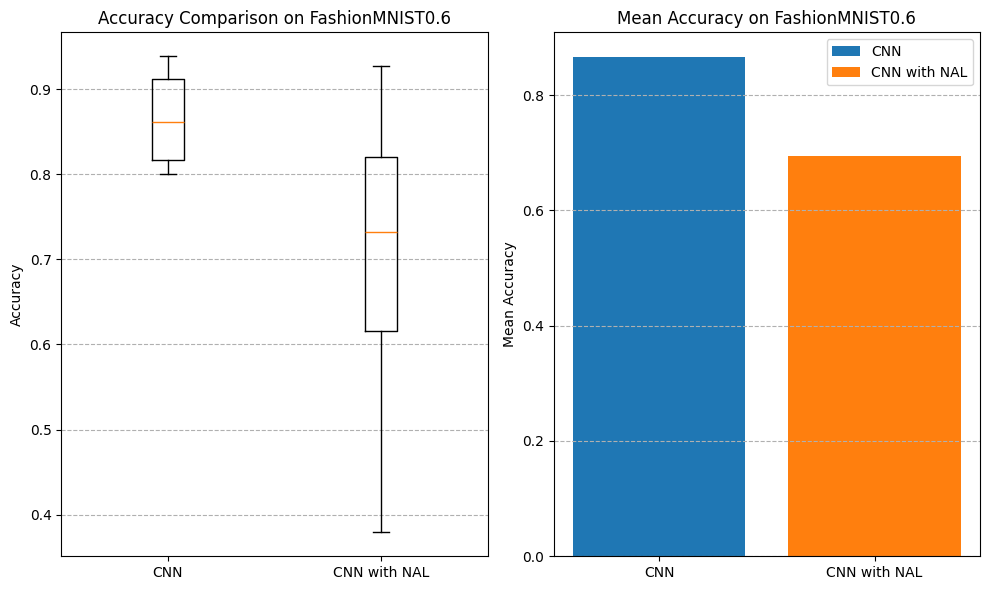

In [ ]:
with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.6')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.6')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.savefig("figures/mnist0.6_result.png", dpi=300)
plt.show()


# CIFAR
## Load dataset

In [ ]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/CIFAR.npz')

## Preprocessing

In [ ]:
training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(aug_training, aug_labels)
val_dataset = ImageDataset(validation_subset, validation_sub_labels)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [ ]:
import os
prediction_results = []
accuracy_results = []
T_hats = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNN(num_classes=3, dataset_name="CIFAR")
    cnn.train(train_dataset, val_dataset)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    T_hats.append(train_dataset.transition_matrix)
    # reset transition matrix
    train_dataset.transition_matrix = None
    val_dataset.transition_matrix = None
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnn_CIFAR_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnn_CIFAR_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)

with open('results/cnn_CIFAR_transition_matrices.pkl', 'wb') as f:
    pickle.dump(T_hats, f)

----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 1.1103, Validation Loss: 1.0977, Validation Accuracy: 35.30%
Epoch [2/100], Training Loss: 1.0993, Validation Loss: 1.0988, Validation Accuracy: 37.70%
Epoch [3/100], Training Loss: 1.0920, Validation Loss: 1.0989, Validation Accuracy: 36.00%
Epoch [4/100], Training Loss: 1.0921, Validation Loss: 1.1107, Validation Accuracy: 35.50%
Epoch [5/100], Training Loss: 1.0876, Validation Loss: 1.0998, Validation Accuracy: 37.03%
Epoch [6/100], Training Loss: 1.0780, Validation Loss: 1.1110, Validation Accuracy: 37.27%
Epoch [7/100], Training Loss: 1.0629, Validation Loss: 1.1358, Validation Accuracy: 35.27%
Epoch [8/100], Training Loss: 1.0304, Validation Loss: 1.1674, Validation Accuracy: 34.57%
Epoch [9/100], Training Loss: 0.9641, Validation Loss: 1.2806, Validation Accuracy: 35.37%
Epoch [10/100], Training Loss: 0.8242, Validation Loss: 1.5229, Validation Accuracy: 35.17%
Epoch [11/100], Training Loss: 0.6085, Valida

## CNN with Noise Adaption Layer Training

In [ ]:
import os
prediction_results = []
accuracy_results = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNNWithNAL(num_classes=3, dataset_name="CIFAR")
    cnn.train(train_dataset, val_dataset)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    # reset transition matrix
    train_dataset.transition_matrix = None
    val_dataset.transition_matrix = None
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnnwithnal_CIFAR_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnnwithnal_CIFAR_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)

## Visualisation

### Top-1 Accuracy

C:\Users\brian\AppData\Local\Temp\ipykernel_71616\3295687740.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


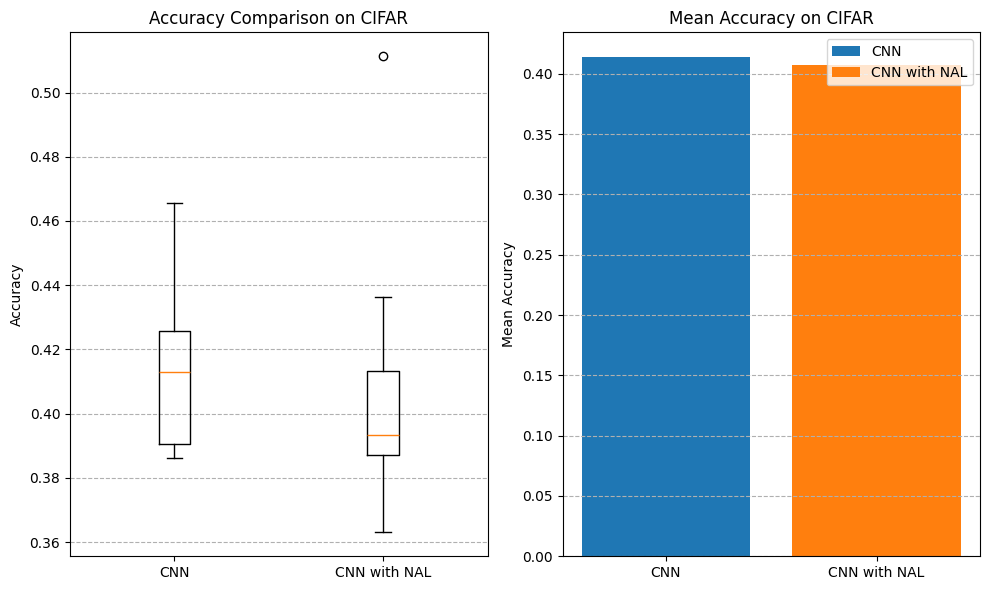

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_CIFAR_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_CIFAR_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on CIFAR')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on CIFAR')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.savefig("figures/CIFAR_result.png", dpi=300)
plt.show()


### Estimated Transition Matrix

In [ ]:
with open('results/cnn_CIFAR_transition_matrices.pkl', 'rb') as f:
    transition_matrix = pickle.load(f)

for i, t in enumerate(transition_matrix):
    output = t.cpu().numpy()
    print(f"Round {i+1}/10")
    for row in output:
        for col in row:
            print(f"{round(float(col), 3)}", end='\t')
        print()
    print()

Round 1/10
0.977	0.008	0.007	
0.009	0.978	0.01	
0.013	0.014	0.983	

Round 2/10
0.958	0.012	0.016	
0.019	0.963	0.022	
0.023	0.025	0.963	

Round 3/10
0.983	0.006	0.009	
0.009	0.989	0.011	
0.008	0.005	0.98	

Round 4/10
0.98	0.015	0.017	
0.012	0.975	0.009	
0.008	0.01	0.973	

Round 5/10
0.977	0.011	0.011	
0.012	0.976	0.013	
0.01	0.013	0.975	

Round 6/10
0.969	0.02	0.012	
0.015	0.962	0.013	
0.016	0.018	0.975	

Round 7/10
0.947	0.029	0.037	
0.035	0.947	0.047	
0.019	0.024	0.916	

Round 8/10
0.981	0.009	0.012	
0.011	0.982	0.013	
0.008	0.009	0.975	

Round 9/10
0.979	0.008	0.015	
0.012	0.982	0.012	
0.009	0.009	0.973	

Round 10/10
0.934	0.026	0.03	
0.031	0.938	0.03	
0.035	0.036	0.939	

